# LANL Earthquake Prediction: Research Prediction Challenge

### This project is aimed at predicting the timing of labratory earthquakes based on seismic signals

-------------------------------------------

### Importing Dependencies :
---

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("Successfully Imported Dependencies")

Successfully Imported Dependencies


### Loading Data:
---

The training csv file is approximatley 6 gigabytes so only fractions of the data file will be loaded at any given time.

In [62]:
%%time
Data = pd.read_csv("/Users/gregeales/LANL-Training-Data.csv", nrows=10000000)
print("success")

success
CPU times: user 2.6 s, sys: 292 ms, total: 2.9 s
Wall time: 2.75 s


### Data Analysis:
---

Training Data includes acoustic_data which is the acoustic strength at the time of measurement. The 2nd column is time_to_failure which is the time until the next labratory earthquake.

In [63]:
print(Data.head())
print(Data.loc[[1]])
print(Data.loc[[100000]])

   acoustic_data  time_to_failure
0             12           1.4691
1              6           1.4691
2              8           1.4691
3              5           1.4691
4              8           1.4691
   acoustic_data  time_to_failure
1              6           1.4691
        acoustic_data  time_to_failure
100000              2         1.443598


Data Successfully Plotted


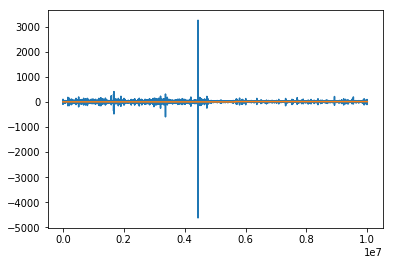

In [64]:
plt.plot(Data["acoustic_data"])
plt.plot(Data["time_to_failure"])
print("Data Successfully Plotted")

### Model Selection:
---

#### Recurrent Neural Networks:

#### Support Vector Machines:

#### 

### Model Optimization
---

### Model Evaluation:
---